In [11]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [12]:
apple = cv.imread('images/apple1.jpg')
orange = cv.imread('images/orange.png')

apple = cv.resize(apple, (256, 256))
orange = cv.resize(orange, (256, 256))

## Generate gaussian pyramids for apple image
apple_layer = apple.copy()
gp_apple = [apple_layer]
for i in range(6):
    apple_layer = cv.pyrDown(apple_layer)
    gp_apple.append(apple_layer)
                   
## Generate gaussian pyramids for orange image
orange_layer = orange.copy()
gp_orange = [orange_layer]
for i in range(6):
    orange_layer = cv.pyrDown(orange_layer)
    gp_orange.append(orange_layer)


## Generate Laplacian pyramids for apple image
apple_layer = gp_apple[5]
lp_apple = [apple_layer]
for i in range(5, 0, -1):
    gaussian_extended = cv.pyrUp(gp_apple[i])
    laplacian = cv.subtract(gp_apple[i-1],gaussian_extended)
    lp_apple.append(laplacian)
    
    
## Generate Laplacian pyramids for orange image
orange_layer = gp_orange[5]
lp_orange = [orange_layer]
for i in range(5, 0, -1):
    gaussian_extended = cv.pyrUp(gp_orange[i])
    laplacian = cv.subtract(gp_orange[i-1],gaussian_extended)
    lp_orange .append(laplacian)
    
    
    
apple_orange_pyramid = []
n = 0

for apple_lap, orange_lap in zip(lp_apple, lp_orange):
    n+=1
    cols, rows, ch = apple_lap.shape
    laplacian = np.hstack((apple_lap[:, 0:int(cols/2)], orange_lap[:, int(cols/2):]))
    apple_orange_pyramid.append(laplacian)
    
    
apple_orange_reconstruct = apple_orange_pyramid[0]
for i in range(1, 6):
    apple_orange_reconstruct = cv.pyrUp(apple_orange_reconstruct)
    apple_orange_reconstruct = cv.add(apple_orange_pyramid[i], apple_orange_reconstruct)


apple_orange = np.hstack((apple[:, :128], orange[:, 128:]))

cv.imshow('apple', apple)
cv.imshow('orange', orange)
cv.imshow('apple_orange', apple_orange)
cv.imshow('apple_orange_reconstruct', apple_orange_reconstruct)


cv.waitKey(0)
cv.destroyAllWindows()

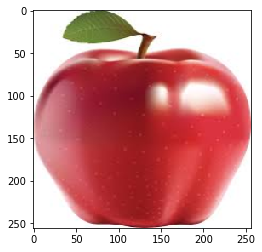

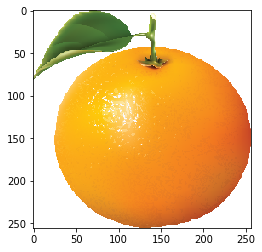

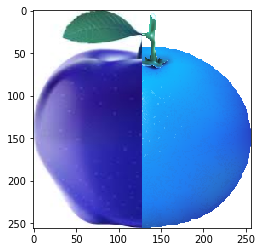

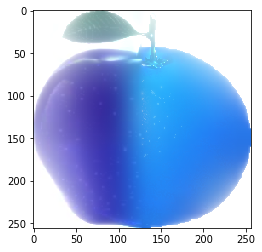

In [13]:
apple = cv.cvtColor(apple, cv.COLOR_BGR2RGB)
plt.imshow(apple)
plt.show()
orange = cv.cvtColor(orange, cv.COLOR_BGR2RGB)
plt.imshow(orange)
plt.show()
apple_orange = cv.cvtColor(apple_orange, cv.COLOR_BGR2RGB)
plt.imshow(apple_orange)
plt.show()
apple_orange_reconstruct = cv.cvtColor(apple_orange_reconstruct, cv.COLOR_BGR2RGB)
plt.imshow(apple_orange_reconstruct)
plt.show()

